## Моделирование процесса теплообмена в теплообменных аппаратах

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib.ticker import LinearLocator, FormatStrFormatter, MultipleLocator, AutoMinorLocator
from matplotlib import cm

In [2]:
class Lab4(object):
    def __init__(self, g1, g2, c1, c2, d1, d2, f, start_series_first, start_series_second, iterations, revers=False):
        iterations += 1
        self._g1 = g1
        self._g2 = g2
        self._c1 = c1
        self._c2 = c2
        self._d1 = d1
        self._d2 = d2
        self._f = f
        self._iterations = iterations
        self._revers = revers
        
        self._first_series = np.array([start_series_first] * iterations)
        self._second_series = np.array([start_series_second] * iterations)
        self._third_series = np.array([self._calculate_third_series_value(0)] * iterations)
    
    def _calculate_third_series_value(self, iteration):
        value = self._d1 * self._f * self._first_series[iteration]
        value += self._d2 * self._f * self._second_series[iteration]
        value /= (self._d1 * self._f + self._d2 * self._f)
        return value
    
    def _calculate_first_series_value(self, iteration):
        value = self._g1 * self._c1 * self._first_series[iteration-1]
        value += self._d1 * self._f * self._third_series[iteration-1]
        value -= self._d1 * self._f * self._first_series[iteration-1] / 2.0
        value /= (self._g1 * self._c1 + self._d1 * self._f / 2.0)
        return value
    
    def _calculate_second_series_value(self, iteration):
        value = self._g2 * self._c2 * self._second_series[iteration-1]
        value += self._d2 * self._f * self._third_series[iteration-1]
        value -= self._d2 * self._f * self._second_series[iteration - 1] / 2.0
        value /= (self._g2 * self._c2 + self._d2 * self._f / 2.0)
        return value
    
    def main(self, iterations=10):
        if self._revers:
            for i in range(1, self._iterations):
                self._first_series[i] = self._calculate_first_series_value(i)
            for i in range(1, self._iterations):
                self._third_series[i] = self._calculate_third_series_value(i)
            for i in range(1, self._iterations):
                self._second_series[self._iterations - i - 1] = self._calculate_second_series_value(self._iterations - i - 1)
        for i in range(1, self._iterations):
            self._third_series[i] = self._calculate_third_series_value(i)
            self._first_series[i:i+2] = self._calculate_first_series_value(i)
            self._second_series[i:i+2] = self._calculate_second_series_value(i)
        self.print_seris(self._second_series, "T2")
        self.print_seris(self._third_series, "T3")
        self.print_seris(self._first_series, "T1")
        self.plot()
    
    @staticmethod
    def print_seris(matrix, message):
        print(message)
        data = pd.DataFrame(matrix)
        display(data)
        
    def plot(self):
        fig = plt.figure(dpi=200)
        ax = fig.add_subplot(111)
        ax.grid(which='major')
        ax.grid(which='minor')
        ax.grid(True)
        ax.plot(self._first_series, label="T1")
        ax.plot(self._second_series, label="T2")
        ax.plot(self._third_series, label="T3")
        leg = plt.legend(bbox_to_anchor=(0.795,1.01),\
        bbox_transform=plt.gcf().transFigure, ncol=3)
        leg_lines = leg.get_lines()
        leg_texts = leg.get_texts()
        plt.setp(leg_lines, linewidth=2)
        plt.show()

T2


,0
0,300.000000
1,279.767442
2,262.358031
3,247.377841
4,234.487910
5,223.396573
6,213.852866
7,205.640838
8,198.574674
9,192.494487


T3


,0
0,155.0
1,155.0
2,155.0
3,155.0
4,155.0
5,155.0
6,155.0
7,155.0
8,155.0
9,155.0


T1


,0
0,10.000000
1,30.232558
2,47.641969
3,62.622159
4,75.512090
5,86.603427
6,96.147134
7,104.359162
8,111.425326
9,117.505513


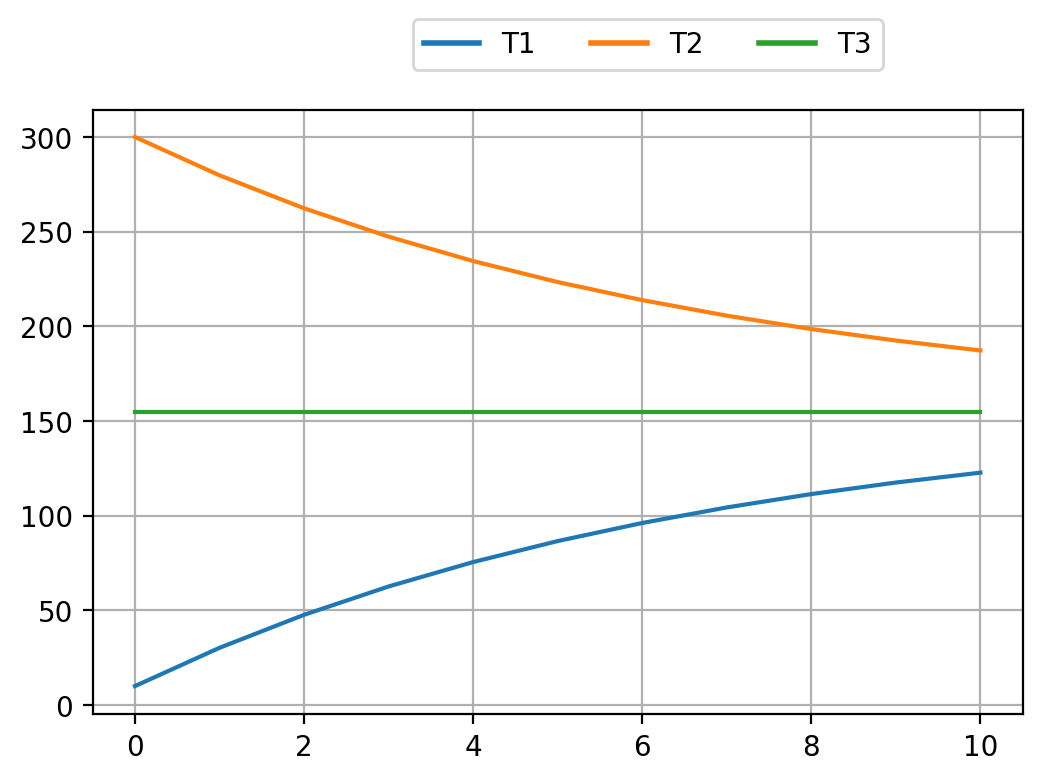

In [3]:
g1 = 1.0
g2 = 1.0
c1 = 5.0
c2 = 5.0
d1 = 15.0
d2 = 15.0
f = 0.05

t1_start = 10.0
t2_start = 300.0

iterations=10
lab4 = Lab4(g1, g2, c1, c2, d1, d2, f, t1_start, t2_start, iterations)
lab4.main()